## AI/ML Salaries;

data source:
[https://www.kaggle.com/datasets/cedricaubin/ai-ml-salaries?resource=download](https://www.kaggle.com/datasets/cedricaubin/ai-ml-salaries?resource=download)



## Here are the information about the columns:

**work_year:**

The year the salary was paid.

**experience_level:**

The experience level in the job during the year with the following possible values:
EN: Entry-level / Junior
MI: Mid-level / Intermediate
SE: Senior-level / Expert
EX: Executive-level / Director

**employment_type: **

The type of employement for the role:
PT: Part-time
FT: Full-time
CT: Contract
FL: Freelance

**job_title:**

The role worked in during the year.

**salary**:

The total gross salary amount paid.

**salary_currency: **

The currency of the salary paid as an ISO 4217 currency code.

**salary_in_usd:**

The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).

**employee_residence**:

 Employee's primary country of residence in during the work year as an ISO 3166 country code.

**remote_ratio**:

The overall amount of work done remotely, possible values are as follows:
0: No remote work (less than 20%)
50: Partially remote
100: Fully remote (more than 80%)

**company_location:**

The country of the employer's main office or contracting branch as an ISO 3166 country code.

**company_size:**

The average number of people that worked for the company during the year:
S: less than 50 employees (small)
M: 50 to 250 employees (medium)
L: more than 250 employees (large)

## Import Statement and Reading DataSet

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Data Set Overview

In [ ]:
data = pd.read_csv('salaries.csv')

In [ ]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Analytics Engineer,77500,CAD,59615,CA,100,CA,S
1,2024,SE,FT,AI Developer,252000,USD,252000,US,0,US,M
2,2024,SE,FT,AI Developer,168000,USD,168000,US,0,US,M
3,2024,MI,FT,Data Scientist,199500,USD,199500,US,100,US,M
4,2024,MI,FT,Data Scientist,86700,USD,86700,US,100,US,M


In [ ]:
print(f"The shape of the dataset is {data.shape}")

The shape of the dataset is (18056, 11)


In [ ]:
print("Does this data have NaN values?")
print(data.isna().values.any())

Does this data have NaN values?
False


In [ ]:
print("Does this data have duplicated values?")
print(data.duplicated().values.any())
print(data.duplicated(subset=['work_year', 'job_title', 'company_location', 'experience_level', 'employee_residence']).values.sum())
df_cleaned = data.drop_duplicates(subset=['work_year', 'job_title', 'company_location', 'experience_level', 'employee_residence'])


Does this data have duplicated values?
True
16805


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18056 entries, 0 to 18055
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           18056 non-null  int64 
 1   experience_level    18056 non-null  object
 2   employment_type     18056 non-null  object
 3   job_title           18056 non-null  object
 4   salary              18056 non-null  int64 
 5   salary_currency     18056 non-null  object
 6   salary_in_usd       18056 non-null  int64 
 7   employee_residence  18056 non-null  object
 8   remote_ratio        18056 non-null  int64 
 9   company_location    18056 non-null  object
 10  company_size        18056 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.5+ MB


Although I tried to remove duplicated values, but since the majority of the dataset could be thought as "duplicates" because there is no specific indicator (like actual company names). So I will be proceeding with the full set for now.

In [ ]:
# change the name of the remote ratio column because it can be missing leading as numeric data
print(data.remote_ratio.unique())
remote_mapping = {100: 'Fully remote', 50: 'Partially remote', 0: 'Not remote'}
data['remote_ratio'] = data['remote_ratio'].replace(remote_mapping)

[100   0  50]


## Descriptive Statistics

I will mainly be looking at the salary in usd just to standardize things:
We can see that on averge, people working in data makes 158,856 dollars. The least someone make is 15,000.

In [ ]:
data.describe()

,work_year,salary,salary_in_usd
count,"18,056.00","18,056.00","18,056.00"
mean,"2,023.29","163,875.14","150,856.15"
std,0.72,"326,562.88","68,728.94"
min,"2,020.00","14,000.00","15,000.00"
25%,"2,023.00","104,000.00","103,500.00"
50%,"2,023.00","143,000.00","142,200.00"
75%,"2,024.00","190,000.00","188,500.00"
max,"2,024.00","30,400,000.00","800,000.00"


## Salary change trend by year

In [ ]:
# From the following plot we can see the from 2020-2021, there is a small dip in the average salary, but that oculd be
# the result of covid 19; and after workds, the general trend is increasing.

In [ ]:
# data['work_year'] = pd.to_datetime(data['work_year'])
yearly_avg_salary = data.groupby("work_year", as_index=False).agg({"salary_in_usd":pd.Series.mean})

In [ ]:
yearly_avg_salary

,work_year,salary_in_usd
0,2020,"102,250.87"
1,2021,"99,922.07"
2,2022,"134,349.50"
3,2023,"153,732.66"
4,2024,"153,170.36"


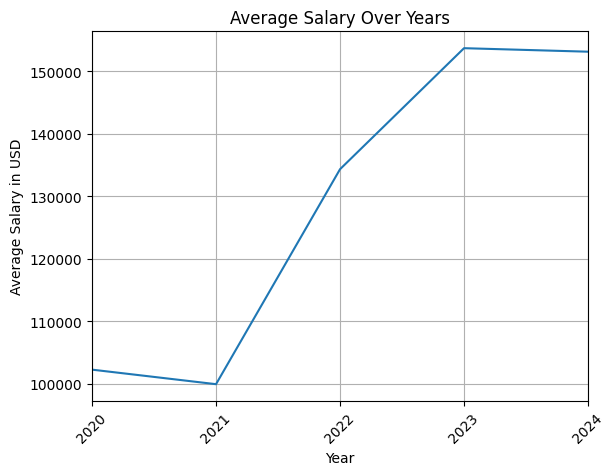

In [ ]:
ax =sns.lineplot(data=yearly_avg_salary, x ="work_year", y="salary_in_usd" )
ax.set(ylabel="Average Salary in USD",
       xlabel="Year",
       xlim=(2020, 2024))
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.xticks(rotation=45)
ax.set_title('Average Salary Over Years')
plt.grid(True)
plt.show()

## Salary among each work experience group

## Plot year vs salary by group

The average salay among the group seems to make sense, as you have more experiece, the average salary increase.

In [ ]:
work_experience_salary = data.groupby("experience_level", as_index=False).agg({"salary_in_usd":pd.Series.mean})
work_experience_salary.sort_values("salary_in_usd")

,experience_level,salary_in_usd
0,EN,"93,027.95"
2,MI,"128,971.43"
3,SE,"164,845.81"
1,EX,"197,198.48"


But when we look at the distribution on a box plot, we can see that there are some outliers in even in the entry level that makes more than the EX level in this data set.

In [ ]:
work_experience_salary = data.groupby("experience_level", as_index=False)
work_experience_salary

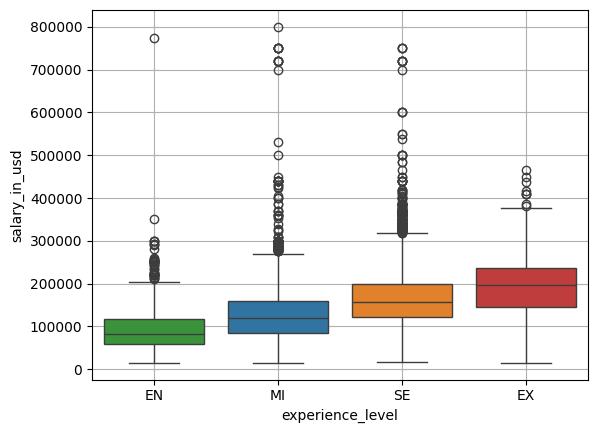

In [ ]:
order = ['EN', 'MI', 'SE', 'EX']
sns.boxplot(data=data, x ="experience_level", y="salary_in_usd", hue="experience_level", order=order)
ax.set(ylabel="Average Salary in USD",
       xlabel="Year")
ax.set_title('Average Salary for groups')
plt.grid(True)
plt.show()

## Line plot of average salary by group

And for all group, we can see that in general, the trend is going upwards.

In [ ]:
yearly_avg_by_group = data.groupby(["work_year", "experience_level"], as_index=False).agg({"salary_in_usd":pd.Series.mean})
yearly_avg_by_group

,work_year,experience_level,salary_in_usd
0,2020,EN,"69,840.67"
1,2020,EX,"179,958.25"
2,2020,MI,"91,870.94"
3,2020,SE,"138,648.89"
4,2021,EN,"63,463.07"
5,2021,EX,"186,128.00"
6,2021,MI,"86,818.39"
7,2021,SE,"125,989.75"
8,2022,EN,"80,018.70"
9,2022,EX,"188,260.29"


In [ ]:
import plotly.express as px

In [ ]:
l_chart = px.line(yearly_avg_by_group,
                  x='work_year',
                  y='salary_in_usd',
                  color='experience_level',
                  hover_name='experience_level')

l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Average Salary')

l_chart.show()

## Location Analysis

In [ ]:
# pip install geopandas matplotlib

In [ ]:
data.company_location.nunique()

77

In [ ]:
import geopandas as gpd

In [133]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<ipython-input-133-1902369eb8ba>:1: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



In [134]:
alpha2_to_alpha3 = {
    'CA': 'CAN', 'US': 'USA', 'GB': 'GBR', 'FR': 'FRA', 'DE': 'DEU',
    'ES': 'ESP', 'SE': 'SWE', 'MX': 'MEX', 'IE': 'IRL', 'PL': 'POL',
    'IN': 'IND', 'AU': 'AUS', 'NL': 'NLD', 'LT': 'LTU', 'DK': 'DNK',
    'ZA': 'ZAF', 'NZ': 'NZL', 'AR': 'ARG', 'KE': 'KEN', 'LV': 'LVA',
    'IL': 'ISR', 'FI': 'FIN', 'AT': 'AUT', 'BR': 'BRA', 'CH': 'CHE',
    'AE': 'ARE', 'SA': 'SAU', 'UA': 'UKR', 'EG': 'EGY', 'PH': 'PHL',
    'TR': 'TUR', 'OM': 'OMN', 'PT': 'PRT', 'BA': 'BIH', 'IT': 'ITA',
    'AS': 'ASM', 'EE': 'EST', 'MT': 'MLT', 'HU': 'HUN', 'LB': 'LBN',
    'RO': 'ROU', 'VN': 'VNM', 'NG': 'NGA', 'LU': 'LUX', 'GI': 'GIB',
    'CO': 'COL', 'SI': 'SVN', 'GR': 'GRC', 'MU': 'MUS', 'RU': 'RUS',
    'KR': 'KOR', 'CZ': 'CZE', 'QA': 'QAT', 'GH': 'GHA', 'AD': 'AND',
    'EC': 'ECU', 'NO': 'NOR', 'JP': 'JPN', 'HK': 'HKG', 'CF': 'CAF',
    'SG': 'SGP', 'TH': 'THA', 'HR': 'HRV', 'AM': 'ARM', 'PK': 'PAK',
    'IR': 'IRN', 'BS': 'BHS', 'PR': 'PRI', 'BE': 'BEL', 'ID': 'IDN',
    'MY': 'MYS', 'HN': 'HND', 'DZ': 'DZA', 'IQ': 'IRQ', 'CN': 'CHN',
    'CL': 'CHL', 'MD': 'MDA'
}

In [135]:
df_loc = data.groupby(['company_location'], as_index=False).agg({'salary_in_usd': pd.Series.mean})
df_loc.sort_values('salary_in_usd', ascending=False)

,company_location,salary_in_usd
64,QA,"300,000.00"
37,IL,"189,772.25"
62,PR,"167,500.00"
74,US,"157,844.21"
57,NZ,"146,761.25"
...,...,...
72,TR,"23,094.67"
71,TH,"22,971.33"
32,HN,"20,000.00"
49,MD,"18,000.00"


In [136]:
df_loc['iso_a3'] = df_loc['company_location'].map(alpha2_to_alpha3)


In [139]:
merged = world.set_index('iso_a3').join(df_loc.set_index('iso_a3'))

In [141]:
merged.dropna(inplace=True)

In [142]:
print(len(merged))

70


In [144]:
merged

,pop_est,continent,name,gdp_md_est,geometry,company_location,salary_in_usd
iso_a3,,,,,,,
CAN,"37,589,262.00",North America,Canada,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",CA,"143,732.99"
USA,"328,239,523.00",North America,United States of America,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",US,"157,844.21"
IDN,"270,625,568.00",Asia,Indonesia,1119190,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",ID,"34,208.00"
ARG,"44,938,712.00",South America,Argentina,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",AR,"62,444.44"
CHL,"18,952,038.00",South America,Chile,282318,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...",CL,"40,038.00"
...,...,...,...,...,...,...,...
CZE,"10,669,709.00",Europe,Czechia,250680,"POLYGON ((15.01700 51.10667, 15.49097 50.78473...",CZ,"69,478.67"
JPN,"126,264,931.00",Asia,Japan,5081769,"MULTIPOLYGON (((141.88460 39.18086, 140.95949 ...",JP,"110,821.62"
SAU,"34,268,528.00",Asia,Saudi Arabia,792966,"POLYGON ((34.95604 29.35655, 36.06894 29.19749...",SA,"139,999.33"


In [150]:
# fig, ax = plt.subplots(1, 1, figsize=(15, 10))
# world.boundary.plot(ax=ax, linewidth=1, color='black')  # Plot boundaries for clarity
# merged.plot(column='salary_in_usd', ax=ax, legend=True, hover_name='name',
#             legend_kwds={'label': "Average Salary",
#                          'orientation': "horizontal"})
# ax.set_title('Average Salary by Region')

# plt.show()


fig = px.choropleth(merged,locations=merged.index, color='salary_in_usd',
                           color_continuous_scale="matter",
                            hover_name='name',)
fig.update_layout(coloraxis_showscale=True,)

fig.show()

## Company Size Analysis

It is interesting to see that the medium companies actually pays the most

In [151]:
data.company_size.unique()

array(['S', 'M', 'L'], dtype=object)

In [152]:
comp_size = data.groupby("company_size", as_index=False).agg({"salary_in_usd":pd.Series.mean})
comp_size.sort_values("salary_in_usd")

,company_size,salary_in_usd
2,S,"87,914.30"
0,L,"141,485.30"
1,M,"152,199.59"


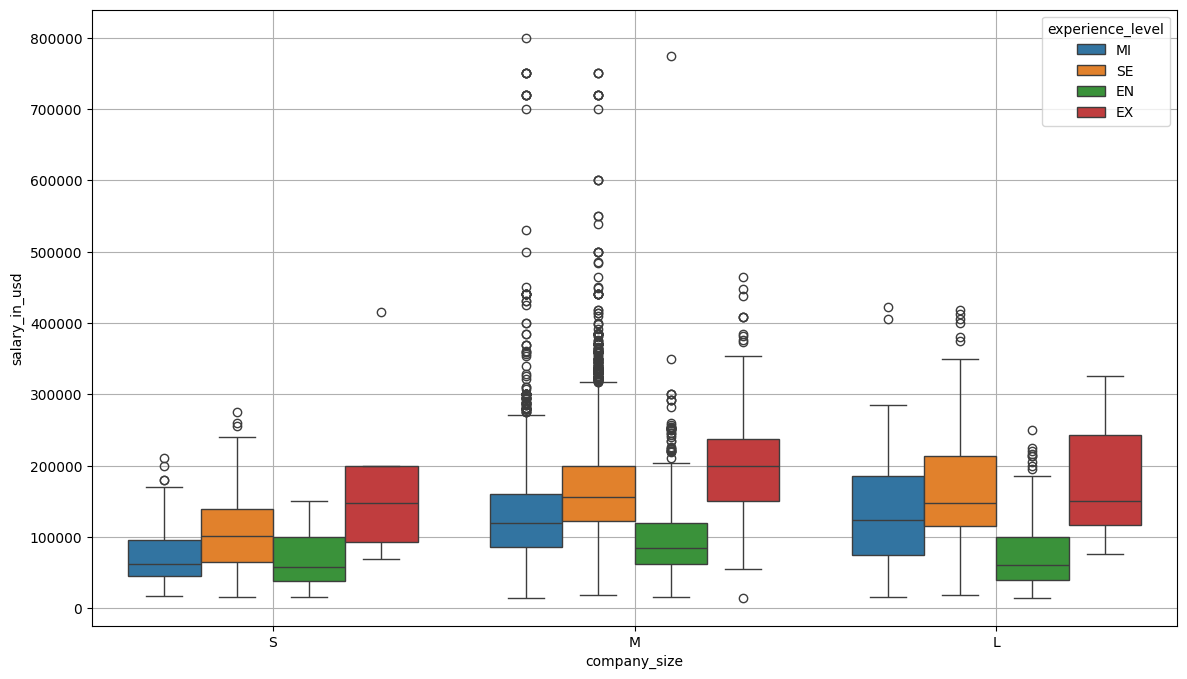

In [155]:
plt.figure(figsize=(14,8))
order = ['S', 'M', 'L']
sns.boxplot(data=data, x ="company_size", y="salary_in_usd", hue="experience_level", order=order)
ax.set(ylabel="Average Salary in USD",
       xlabel="Year")
ax.set_title('Average Salary for groups')
plt.grid(True)
plt.show()

## Remote vs Onsite analysis

We can see that being fully remote or fully onsite does not change much in terms of salary; but when you are partially remote, that might means one is working less hours, etc, but they get paid the least

In [157]:
remote_ratio = data.groupby("remote_ratio", as_index=False).agg({"salary_in_usd":pd.Series.mean})
remote_ratio.sort_values("salary_in_usd")

,remote_ratio,salary_in_usd
2,Partially remote,"82,984.47"
0,Fully remote,"145,722.79"
1,Not remote,"154,489.27"


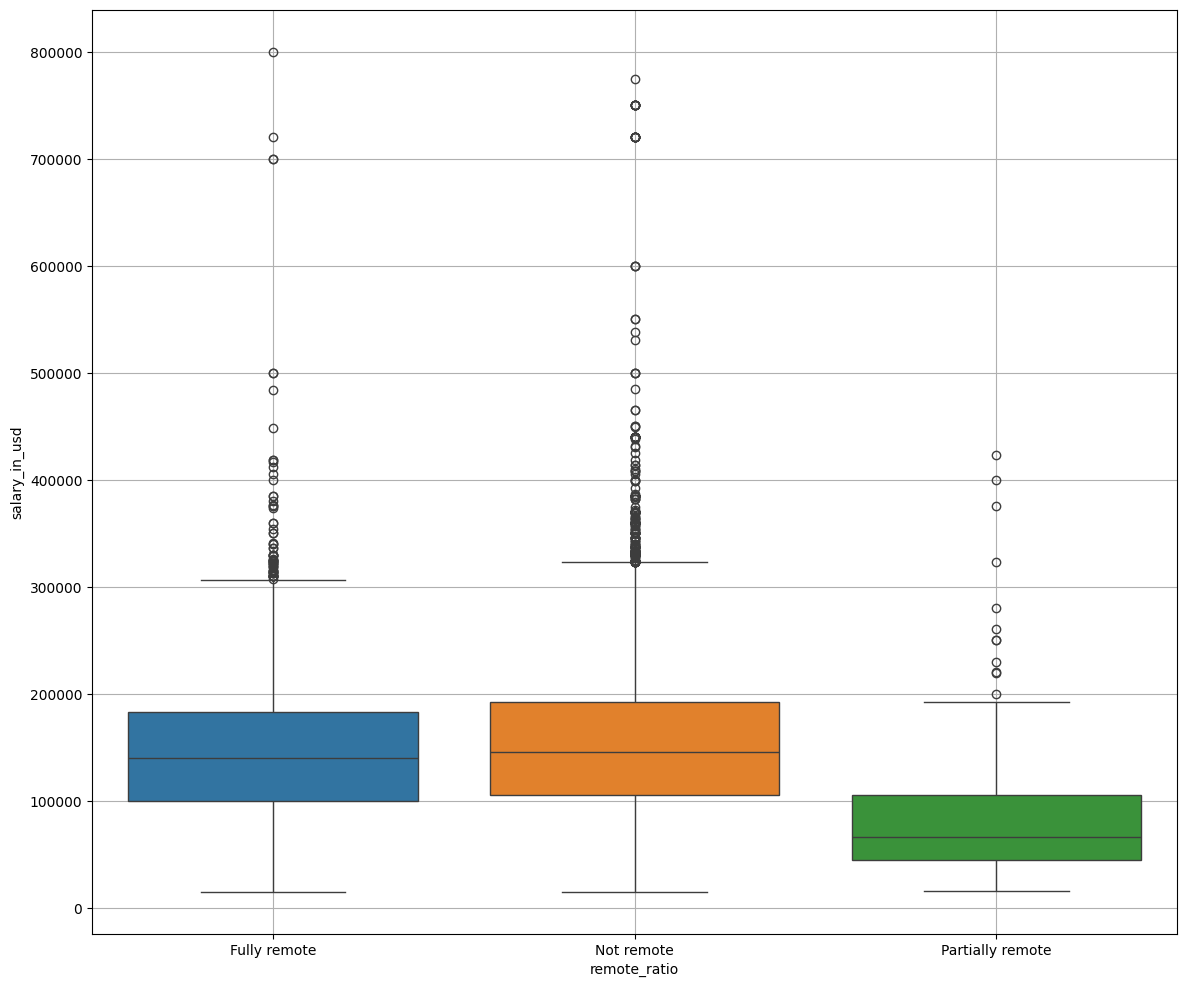

In [163]:
plt.figure(figsize=(14,12))
sns.boxplot(data=data, x ="remote_ratio", y="salary_in_usd", hue="remote_ratio")
ax.set(ylabel="Average Salary in USD",
       xlabel="Year")
ax.set_title('Average Salary for groups')
plt.grid(True)
plt.show()